#Data Scraping

##Using Requests

In [ ]:
import requests 
from bs4 import BeautifulSoup as bs

try:
  from fake_useragent import UserAgent
except:
  !pip install fake_useragent
  from fake_useragent import UserAgent
  
import re
import pandas
import time
import ast

**L O G G I N G  - I N   
  U S I N G  
  R E Q U E S T S**

In [ ]:

ua = UserAgent()
headers = {
    'User-agent' : ua.random,
    'Referer'    : 'http://www.metservice.gov.tt/climate_data/index.php?signIn=1',
    'Origin'     : 'http://www.metservice.gov.tt',
}

url = 'http://www.locationary.com/home/index2.jsp'
# requests.post(url, data=payload)

url = 'http://www.metservice.gov.tt/climate_data/Piarco_view.php'

payload = {    
    'username'   : 'Username',
    'password'   : 'Password'}

url = 'http://www.metservice.gov.tt/climate_data/index.php?signIn=1'
r   = session.post(url,data = payload)
if r.status_code == 200 :
  r = session.get('http://www.metservice.gov.tt/climate_data/Piarco_view.php',headers= headers,timeout=5 )
  soup = bs(r.text,'lxml')
  soup.prettify
# as can see there arent any table data showing meaning that the page is run by javascript so we'll use selenium now to scrape this site
# also log - in was a success.

## Using Selenium

In [ ]:
import subprocess
import sys
import os

!pip install autokey
!pip install selenium
!pip install webdriver_manager
!pip install PyAutoIt
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin


sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import StaleElementReferenceException

import pickle
import os
import textwrap
from google.colab import files

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By

In [ ]:

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
browser = webdriver.Chrome('chromedriver',options=chrome_options)
browser.refresh()

profile = ""

#-----------------------------------------
#                L O G  I N 
#-----------------------------------------

browser.get("http://www.metservice.gov.tt/climate_data/index.php?signIn=1")

username = 'Username'
password = 'Password'

login = browser.find_elements_by_class_name('form-control')
username_box = login[0]
username_box.send_keys(username)

password_box = login[1]
password_box.send_keys(password)
password_box.send_keys(Keys.RETURN)

time.sleep(5)
browser.get('http://www.metservice.gov.tt/climate_data/Piarco_view.php')
data = [] # Data list to save scraped text data
i = 1

In [ ]:
while(True):

  try : 
    texts = browser.find_element_by_id('PiarcoID').text
    data.append(texts)
    print(i,texts[-20:])
    # browser.find_element_by_class_name('paginate_button.next').click()
    browser.execute_script("arguments[0].click();", WebDriverWait(browser, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "#PiarcoID_next"))))
    time.sleep(2)
    i+=1
  except:
    print('Something Wrong')
    break;
    
browser.quit()  

Screenshot to see what's going on

In [ ]:
browser.save_screenshot('file.png')
files.download("/content/file.png")

Data organization and appending to a csv file using pandas

In [ ]:
ORGANIZED = []
for j in data:
  for i in j.split('\n')[1:]:
    
    try:
      save = {
      'Year'         : i.split(' ')[0],
      'Month'        : i.split(' ')[1],
      'Day'          : i.split(' ')[2],
      'Precip'       : i.split(' ')[3],
      'Temp Max'     : i.split(' ')[4],
      'Temp Min'     : i.split(' ')[5]
      }
      ORGANIZED.append(save)
    except:
      print(i)

2017 9 31


In [ ]:
import pandas as pd

df = pd.DataFrame(ORGANIZED)

In [ ]:
df[df['Year']=='2010']

,Year,Month,Day,Precip,Temp Max,Temp Min
10592,2010,6,9,25.4,33.7,24.8
10593,2010,6,10,9.8,30.2,24.9
10594,2010,6,11,0.4,32.5,23.6
10595,2010,6,12,0,33.2,23.7
10596,2010,6,13,0.2,32.5,24.8
...,...,...,...,...,...,...
10952,2010,6,4,12,33.5,24.9
10953,2010,6,5,0.4,34.3,25.4
10954,2010,6,6,0.6,34.1,25.1
10955,2010,6,7,2.4,33,25.4


In [ ]:
df.to_csv('metoffice_historicalWeather_datasets.csv')

In [ ]:
df

,Year,Month,Day,Precip,Temp Max,Temp Min
0,1981,9,13,0.0,32.7,22.0
1,1981,1,1,0.2,30.9,20.0
2,1981,9,14,6.8,32.6,24.5
3,1981,1,2,5.7,31.4,21.3
4,1981,9,15,29.3,30.7,23.4
...,...,...,...,...,...,...
14605,2020,6,8,3.1,33.9,23.6
14606,2020,6,9,1.5,32.0,24.0
14607,2020,6,10,29.1,29.7,24.2
14608,2020,6,11,0.0,32.2,22.1


# **Data Preparation Using CSV** 

In [1]:
import pandas as pd
import os

# Cloning Git for Scraped Dataset If not want to use the scraping method above.
if os.path.isdir('/content/WeatherAnalysis') == False:
  !git clone https://github.com/surenjanath/WeatherAnalysis.git
else :
  print('Dataset Cloned')

Cloning into 'WeatherAnalysis'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [2]:
df = pd.read_csv('/content/WeatherAnalysis/metoffice_historicalWeather_datasets(cleaned).xls',index_col=0)

In [3]:
save = df[df['Precip'] == 'TR'].index
df.loc[save,'Precip']  = 0.0
df['Precip'] = pd.to_numeric(df['Precip']) # ValueError: Unable to parse string "TR" at position 13415

#Now set the TRs to the mean values so
df.loc[save,'Precip'] = df.Precip.mean()

In [4]:
#Check for duplicates
print('No of Duplicates : ',df.duplicated().sum())

#Check for empty data.
print(df.isnull().sum())


No of Duplicates :  0
Year        0
Month       0
Day         0
Precip      0
Temp Max    0
Temp Min    0
dtype: int64


CONVERT DATE ( concatenate )


In [5]:
df['DATE'] = pd.to_datetime(df[["Year", "Month", "Day"]])

In [34]:
Copy_df = df.copy

Drop Unnecessary Columns : 

*   Day
*   Month
*   Year

Reordered Columns 





Sort Values by Date

In [6]:
df = df[list(reversed(df.columns))]
# df = df.drop(['Day','Month','Year'],axis = 1)
# DROP DAY 
df = df.drop(['Day'],axis = 1)

In [7]:
df = df.sort_values(by = ['DATE'])

In [8]:
df

,DATE,Temp Min,Temp Max,Precip,Month,Year
1,1981-01-01,20.0,30.9,0.2,1,1981
3,1981-01-02,21.3,31.4,5.7,1,1981
5,1981-01-03,22.6,30.8,0.4,1,1981
7,1981-01-04,20.4,30.6,0.0,1,1981
9,1981-01-05,20.5,31.2,0.0,1,1981


In [21]:
df_temp = df

In [22]:
df_temp['Average_temp'] = (df_temp['Temp Max'] + df_temp['Temp Min'])/2

In [29]:
data_analysis = df_temp[['DATE','Month','Year','Average_temp']]

In [30]:
data_analysis

,DATE,Month,Year,Average_temp
1,1981-01-01,1,1981,25.45
3,1981-01-02,1,1981,26.35
5,1981-01-03,1,1981,26.70
7,1981-01-04,1,1981,25.50
9,1981-01-05,1,1981,25.85
...,...,...,...,...
14547,2020-12-27,12,2020,26.40
14549,2020-12-28,12,2020,26.45
14551,2020-12-29,12,2020,26.25
14553,2020-12-30,12,2020,26.60


In [ ]:
# average temp per month 
Data = []
for i in data_analysis['Year'].unique():
  for j in range(1,13):
    print(i , j)
    Data.append({
        'Date' : data_analysis[(data_analysis['Year'] == i) & (data_analysis['Month'] == j)].iloc[0]['DATE'],
        'Year' : i,
        'Month': j,
        'Temp' : data_analysis[(data_analysis['Year'] == i) & (data_analysis['Month'] == j)]['Average_temp'].mean(),
    })

In [88]:
data_analysis[(data_analysis['Month'] == j)].iloc[0]['DATE']

Timestamp('1981-12-01 00:00:00')

In [124]:
df_averageTemps = pd.DataFrame(Data)

#**ANALYSIS on DF**


In [24]:
#APPLY AUTOENCODER
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
from copy import copy
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from tensorflow import keras
from scipy import stats
#Scale the data
from sklearn.preprocessing import MinMaxScaler
#training data
from sklearn.linear_model import Ridge
from datetime import datetime as dt

In [179]:
def FullDay ( date):
  df.DATE[maxday.index[0]].month_name()
  # print(date.weekday(),date.day,date.month)

  datetimefull= df.DATE[date.index[0]].day_name()+', '+ str(df.DATE[date.index[0]].day) + ' ' + df.DATE[date.index[0]].month_name() + ', ' + str(df.DATE[date.index[0]].year)
  return  datetimefull


In [147]:
df.DATE[maxday.index[0]].day

25

In [61]:
df.describe()

,Temp Min,Temp Max,Precip
count,14610.000000,14610.000000,14610.000000
mean,23.235886,31.870219,5.074073
std,1.325575,1.544686,11.008665
min,17.400000,24.500000,0.000000
25%,22.500000,31.000000,0.000000
50%,23.400000,32.000000,0.400000
75%,24.200000,32.900000,4.900000
max,26.700000,36.500000,155.600000


In [180]:
#MAX TEMPERATURE
maxday = df.loc[df['Temp Max'] == 36.500000,'DATE']
datafram_max = df[df['Temp Max'] == 36.500000]
#MIN TEMPERATURE
minday = df.loc[df['Temp Min'] == df['Temp Min'].min(),'DATE']
datafram_min = df[df['Temp Min'] == df['Temp Min'].min()]

print(datafram_max,'\n')
print(datafram_min)
print('\n Min Temperature in Trinidad was on {} which was {}'.format(FullDay ( minday),df['Temp Min'].min()))
print(' Max Temperature in Trinidad was on {} which was {}'.format(FullDay ( maxday),df['Temp Max'].max()))



           DATE  Temp Min  Temp Max  Precip
3595 1990-09-25      23.0      36.5    11.5 

           DATE  Temp Min  Temp Max  Precip
3121 1989-02-16      17.4      32.2     0.0

 Min Temperature in Trinidad was on Thursday, 16 February, 1989 which was 17.4
 Max Temperature in Trinidad was on Tuesday, 25 September, 1990 which was 36.5


In [ ]:
# On average the days are between	23.235886	- 31.870219

##Visualization

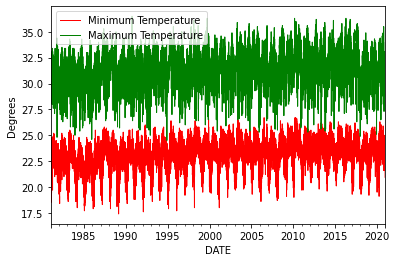

In [184]:
# line plot 
# Temp Min  Temp Max  Precip
df.plot(x = 'DATE', y =['Temp Min','Temp Max'] , label =['Minimum Temperature','Maximum Temperature'],
              color = ['r','g',]
              , linewidth = 1)
plt.ylabel('Degrees')
plt.legend(loc='upper left')

In [ ]:


# PIE CHART 
value = [20,20,20,20]
color = ['g','m','b','r']
labels = ['AAPL','GOOG','T','TSLA']
explode = [0,0.1,0,0.1]

plt.figure(figsize=(6,6))
plt.pie(value,colors=color,labels=labels,explode=explode);
plt.title('STOCK PORTFOLIO')


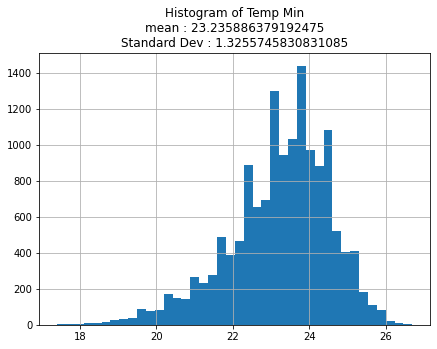

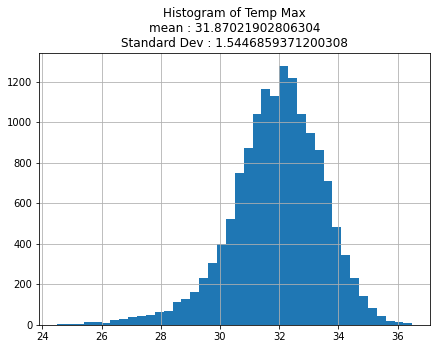

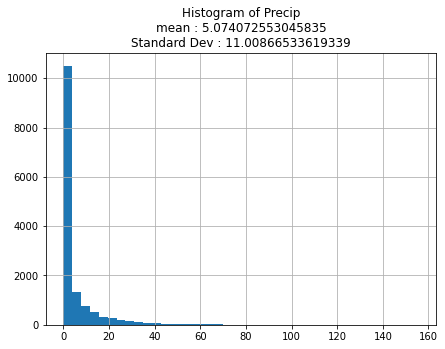

In [188]:

# HISTOGRAM on Max Temp
for i in df.columns[1:]:
  mu = df[i].mean()
  signma = df[i].std()
  plt.figure(figsize=(7,5))
  num_bins = 40
  plt.hist( df[i],num_bins);
  plt.title(f'Histogram of {i}\nmean : {str(mu)}\nStandard Dev : {str(signma)}');
  plt.grid()

Description on Data : 

As can see the temp Min and Temp Max are normally distribute
about their mean while the precip is skewed to the left

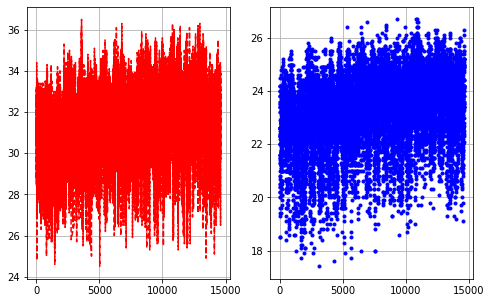

In [190]:

# SUBPLOT
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(df['Temp Max'],'r--')
plt.grid()

plt.subplot(1,2,2,)
plt.plot(df['Temp Min'],'b.')
plt.grid()



In [210]:
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

def interactive_plot(df,title,columns):
  fig = px.line(title = title + 'vs DATE')
  for i in columns:
    fig.add_scatter(x=df['DATE'],y = df[i],name= i )
  fig.show()

def Prediction_window(data,column):
  n = 1
  data['Target'] = data[[column]].shift(-n)
  return data

def show_plot(data,title):
  plt.figure(figsize = (13,5))
  plt.plot(data,linewidth = 3)
  plt.title(title)
  plt.grid()

In [200]:
df

,DATE,Temp Min,Temp Max,Precip
1,1981-01-01,20.0,30.9,0.2
3,1981-01-02,21.3,31.4,5.7
5,1981-01-03,22.6,30.8,0.4
7,1981-01-04,20.4,30.6,0.0
9,1981-01-05,20.5,31.2,0.0
...,...,...,...,...
14547,2020-12-27,21.2,31.6,0.0
14549,2020-12-28,20.9,32.0,0.0
14551,2020-12-29,22.8,29.7,16.9
14553,2020-12-30,23.6,29.6,13.9


In [209]:
interactive_plot(normalize(df),'WEATHER DATA',['Temp Max'])
# ['Temp Max','Temp Min']

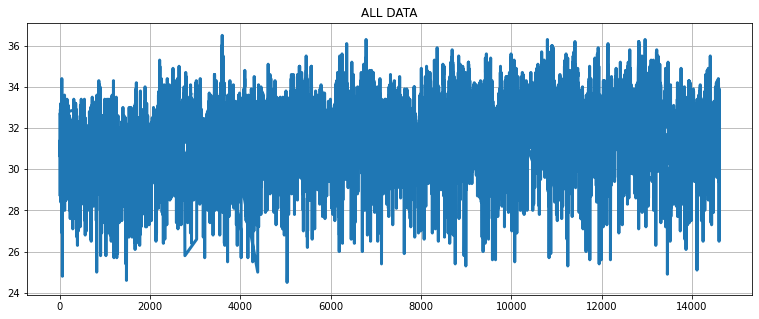

In [206]:
show_plot(df['Temp Max'],'ALL DATA')

,DATE,Temp Min,Temp Max,Precip,Target
1,1981-01-01,20.0,30.9,0.2,31.4
3,1981-01-02,21.3,31.4,5.7,30.8
5,1981-01-03,22.6,30.8,0.4,30.6
7,1981-01-04,20.4,30.6,0.0,31.2
9,1981-01-05,20.5,31.2,0.0,31.3
...,...,...,...,...,...
14545,2020-12-26,22.5,31.2,0.7,31.6
14547,2020-12-27,21.2,31.6,0.0,32.0
14549,2020-12-28,20.9,32.0,0.0,29.7
14551,2020-12-29,22.8,29.7,16.9,29.6


##Machine Learning

Training data for X : (13148, 2) 
Training data for Y : (13148, 2)
Ridge Regression Score :  0.25675127525477226


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning:

The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

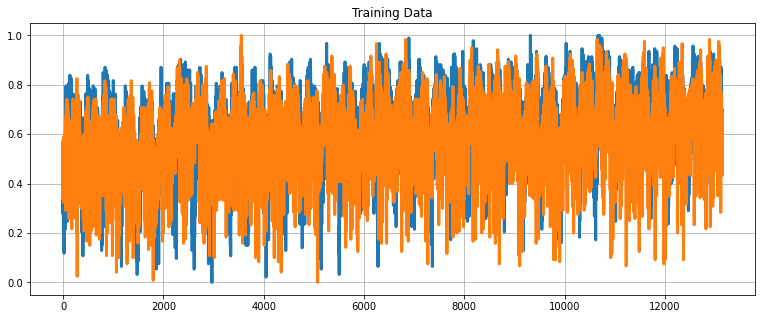

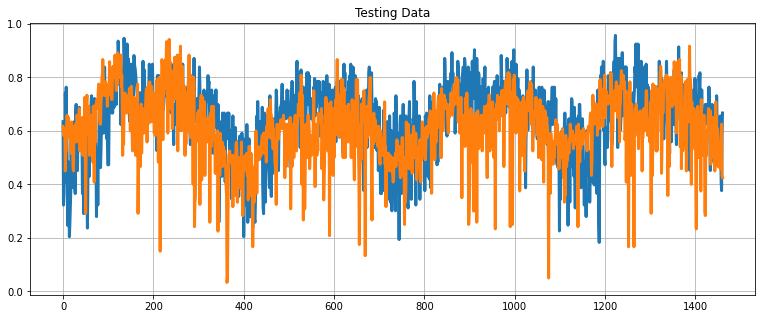

In [218]:


# MODEL REQUIREMENTS
COLUMN   = 'Temp Max'
ALPHA        = 1
TEST_PERCENT = 0.9 # < 1
##########################

# trading window for next day# addded target column
target_df = Prediction_window(df,COLUMN)

# #remove last row because no future data

target_df = target_df[:-1]
target_df



#             DATE  Temp Min	Temp Max	  Precip	Target
#     1	1981-01-01	    20.0  	  30.9	    0.2	    31.4
#     3	1981-01-02	    21.3  	  31.4	    5.7	    30.8
#     5	1981-01-03	    22.6  	  30.8    	0.4	    30.6
#     7	1981-01-04	    20.4  	  30.6	    0.0	    31.2

#Scale the data
sc = MinMaxScaler(feature_range=(0,1))
scaled_df = sc.fit_transform(target_df.drop(columns = ['DATE']))

#FEATURE AND TARGET
x = scaled_df[:,:2]
y = scaled_df[:,2:]

split = int(TEST_PERCENT*len(x))

x_train = x[:split]
x_test  = x[split:]
y_train = y[:split]
y_test  = y[split:]

print(
'Training data for X : {}'.format(x_train.shape),
'\nTraining data for Y : {}'.format(y_train.shape))


show_plot(x_train,'Training Data')
show_plot(x_test,'Testing Data')

##TRAINING DATA

regression_model = Ridge(alpha = ALPHA)
regression_model.fit(x_train,y_train)

#Test Model
lr_accuracy = regression_model.score(x_test,y_test)

print('Ridge Regression Score : ',lr_accuracy)

#Prediction Method 
predicted_temp = regression_model.predict(x)

predicted = []
for i in predicted_temp:
  predicted.append(i[0])

# append the close values
MAX = []
for i in scaled_df:
  MAX.append(i[0])

df_predicted = target_df[['DATE']]
df_predicted['MAX'] = MAX;

df_predicted['Predicted'] = predicted

interactive_plot(df_predicted,'Original Vs Predictions',['Predicted','MAX'])

In [ ]:

## MODELLING USING LSTM
# MODEL REQUIREMENTS
STOCK_NAME   = 'Temp Max'
ALPHA        = 1
TEST_PERCENT = 0.8 # < 1
EPOCH        = 50
BSIZE        = 20
UNITS        = 500
##########################

#skip date
training_data = df.iloc[:,1:3].values

sc = MinMaxScaler(feature_range=(0,1))
scaled_df = sc.fit_transform(training_data)


X = []
Y = []
for i in range(1,len(df)):
  X.append(scaled_df[i-1:i,0])
  Y.append(scaled_df[i,0])

X = np.asarray(X)
Y = np.asarray(Y)
split = int(TEST_PERCENT*len(X))

# Train
X_train = X[:split]
Y_train = Y[:split]

# Test
X_test  = X[split:]
Y_test  = Y[split:]

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_train.shape, X_test.shape
# LSTM MODEL

inputs = keras.layers.Input(shape = (X_train.shape[1],X_train.shape[2]))
x = keras.layers.LSTM(UNITS,return_sequences=True) (inputs) #units = 150
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(UNITS,return_sequences=True) (x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(UNITS,return_sequences=True) (x)
outputs = keras.layers.Dense(1,activation = 'linear')(x)

model = keras.Model(inputs = inputs,outputs = outputs)
model.compile(optimizer = 'adam', loss = 'mse')
print(model.summary())

# TRAIN MODEL
history = model.fit(X_train,Y_train,epochs = EPOCH,batch_size = BSIZE, validation_split = 0.2)

#make predicitions 
predictions = model.predict(X)


#append predicted values to list
test_predicted = []
for i in predictions:
  test_predicted.append(i[0][0])

MAX = []
for i in scaled_df:
  MAX.append(i[0])


df_predicted = df[1:][['DATE']]
df_predicted['Predicted'] = test_predicted
df_predicted['MAX']     = MAX[1:]

interactive_plot(df_predicted,'Original vs Predicted',['MAX',])

##################################################

df_predicted = df[1:][['DATE']]
df_predicted['Predicted'] = test_predicted
df_predicted['MAX']     = MAX[1:]

interactive_plot(df_predicted,'Original vs Predicted',['MAX','Predicted'])

In [ ]:

encoding_dim = 7
#17 columns
input_df = Input(shape=(17,))

x       = Dense(encoding_dim, activation='relu')(input_df)
x       = Dense(500,          activation='relu',  kernel_initializer='glorot_uniform')(x)
x       = Dense(2000,         activation='relu',  kernel_initializer='glorot_uniform')(x)

encoded = Dense(10,           activation='relu',  kernel_initializer='glorot_uniform')(x)

x       = Dense(2000,         activation='relu',  kernel_initializer='glorot_uniform')(encoded)
x       = Dense(500,          activation='relu',  kernel_initializer='glorot_uniform')(x)

decoded = Dense(17,           kernel_initializer='glorot_uniform')(x)

#AutoEncoder 
autoencoder = Model(input_df,decoded)

# Encoder
encoder = Model(input_df,encoded)

autoencoder.compile(optimizer = 'adam',loss = 'mean_squared_error')

# Train Model 

autoencoder.fit(df_scaled,df_scaled,batch_size=128,epochs = 25, verbose = 1)

autoencoder.summary()

pred = encoder.predict(df_scaled)




# Clustering Method : 

score_2 = []
range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(pred)
  score_2.append(kmeans.inertia_)

# Determing number of clusters k based on visual graph 

plt.plot(score_2,'bx-')
plt.title('Finding the Right K')
plt.xlabel('Clusters K ')
plt.ylabel('WCSS')
plt.show()
plt.plot(score_1,'bx-',color = 'r')
plt.plot(score_2,'bx-',color = 'g')

k = 5
kmeans = KMeans(k)
kmeans.fit(pred)
labels = kmeans.labels_
df_pred_clust = pd.concat([df,pd.DataFrame({'cluster':labels})],axis = 1)
df_pred_clust

# PCA METHOD 

pca = PCA(n_components= 2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data= prin_comp,columns = ['pca1','pca2'])

pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis = 1)
pca_df
plt.figure (figsize = (10,10))
ax = sns.scatterplot(x = 'pca1',y = 'pca2',hue = 'cluster',data = pca_df,palette = ['red','blue','green','yellow','black'])

#ANALYSIS ON AVERAGE TEMPS

In [131]:
from datetime import datetime # Time Series analysis.
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [125]:
df_averageTemps.Date = pd.to_datetime(df_averageTemps.Date)


In [126]:
type(df_averageTemps['Date'])

pandas.core.series.Series

In [134]:
df_averageTemps.columns=['Date', 'Year', 'Month', 'Temp']
df_averageTemps.sort_values(by='Date', inplace=True) ## To get the time series right.
fig = go.Figure(layout = go.Layout(yaxis=dict(range=[0, df_averageTemps['Temp'].max()+1])))
fig.add_trace(go.Scatter(x=df_averageTemps['Date'], y=df_averageTemps['Temp']), )
fig.update_layout(title='Temperature Throught Timeline:',
                 xaxis_title='Time', yaxis_title='Temprature in Degrees')
fig.update_layout(xaxis=go.layout.XAxis(
    rangeselector=dict(
        buttons=list([dict(label="Whole View", step="all"),
                      dict(count=1,label="One Year View",step="year",stepmode="todate"),
                      dict(count=120,label="10 Year View",step="year",stepmode="todate")                       
                     ])),
        rangeslider=dict(visible=True),type="date")
)
fig.show()


On a closer look, by clicking on One Year View, we can see that the graph seems distorted in a smooth way because this is how the values really are. The temperature varies every year with months but stays within 25 - 30 degrees.

Insights:

April 2010 has been the hottest month in Trinidad in the history based on the given historical data. What could be the reason ?
Jan, Feb, march,april and may are the Hottest months where one can see the temperature rises. We can group them together as 'Dry Season'.

May, Jun, July ,Aug september and november sometimes december are the coldest months, from graph above we can see the temperature drops steadily. One could group them together as 'Rain Season'.

In the months of May - August the temperature fluctuates. It can be assume that rain falls within these months. 

We have two main seasons in Trinidad and this is how they are grouped:
 

1.   Dry  Season : January to May
2.   Rain Season : June to December

Each Month from January to May, the temperature rises constant, but after May, it fluctuates. 

We also will stick to these seasons for our analysis.


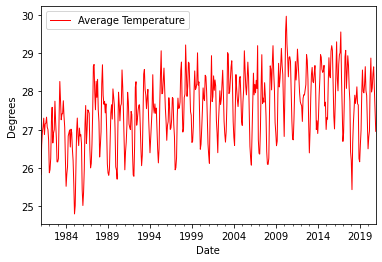

In [132]:
# line plot 
# Temp Min  Temp Max  Precip
df_averageTemps.plot(x = 'Date', y =['Temp'] , label =['Average Temperature'],
              color = ['r','g',]
              , linewidth = 1)
plt.ylabel('Degrees')
plt.legend(loc='upper left')

In [135]:
fig = px.box(df_averageTemps, 'Month', 'Temp')
fig.update_layout(title='Warmest, Coldest and Median Monthly Tempratue.')
fig.show()

**Insights:**

January has the coldest Days in an Year.

May has the hottest days in an Year.

June is the month with least Standard Deviation which means, temperature in June vary least. 

We can expect any day in June to be a warm day.

##K - Cluster

In [137]:
from sklearn.cluster import KMeans
sse = []
target = df_averageTemps['Temp'].to_numpy().reshape(-1,1)
num_clusters = list(range(1, 16))

for k in num_clusters:
    km = KMeans(n_clusters=k)
    km.fit(target)
    sse.append(km.inertia_)

fig = go.Figure(data=[
    go.Scatter(x = num_clusters, y=sse, mode='lines'),
    go.Scatter(x = num_clusters, y=sse, mode='markers')
])

fig.update_layout(title="Evaluation on number of clusters:",
                 xaxis_title = "Number of Clusters:",
                 yaxis_title = "Sum of Squared Distance",
                 showlegend=False)
fig.show()

Based on the graph above a cluster size of 3 seems to be a good choice here

In [139]:
k = 3
km = KMeans(k)
km.fit(df_averageTemps['Temp'].to_numpy().reshape(-1,1))
df_averageTemps.loc[:,'Temp Labels'] = km.labels_
fig = px.scatter(df_averageTemps, 'Date', 'Temp', color='Temp Labels')
fig.update_layout(title = "Temperature clusters.",
                 xaxis_title="Date", yaxis_title="Temperature")
fig.show()

**Insights:**

Despite having two (2) seasons we can see 3 main clusters based on temperatures.


*   Jan, Feb and Dec are the months that have temperatures neither too hot nor too cold.
*   May, Jun, Jul, Aug and Sep; all have hotter temperatures.
*   Apr, Oct and Nov are coldest months








In [141]:
fig = px.histogram(x=df_averageTemps['Temp'], nbins=200, histnorm='density')
fig.update_layout(title='Frequency chart of temperature readings:',
                 xaxis_title='Temperature', yaxis_title='Count')

There is a cluster from 26.5 - 28.5 and mean temperature for most months during history has been between 26.5 - 28.5


In [ ]:
df['Yearly Mean'] = df.iloc[:,1:].mean(axis=1) ## Axis 1 for row wise and axis 0 for columns.
fig = go.Figure(data=[
    go.Scatter(name='Yearly Tempratures' , x=df['YEAR'], y=df['Yearly Mean'], mode='lines'),
    go.Scatter(name='Yearly Tempratures' , x=df['YEAR'], y=df['Yearly Mean'], mode='markers')
])
fig.update_layout(title='Yearly Mean Temprature :',
                 xaxis_title='Time', yaxis_title='Temprature in Degrees')
fig.show()

In [144]:
df_averageTemps[df_averageTemps['Year'] == 2000]['Temp'].mean()

27.502073600296626

In [156]:
data = []
c = 0
for i in df_averageTemps['Year'].unique():
  data.append({
  'Year'        : i,
  'Annual Temp' : df_averageTemps[df_averageTemps['Year'] == i]['Temp'].mean()
  
  })
year_df = pd.DataFrame(data)


In [158]:
year_df.head()

,Year,Annual Temp
0,1981,26.920093
1,1982,26.780646
2,1983,27.186068
3,1984,26.406123
4,1985,26.359142


In [159]:
fig = go.Figure(data=[
    go.Scatter(name='Yearly Temperatures' , x=year_df['Year'], y=year_df['Annual Temp'], mode='lines'),
    go.Scatter(name='Yearly Temperatures' , x=year_df['Year'], y=year_df['Annual Temp'], mode='markers')
])
fig.update_layout(title='Yearly Mean Temperature :',
                 xaxis_title='Time', yaxis_title='Temperature in Degrees')
fig.show()

**We can see that global warming is true.**

We can see a gradual increase in yearly average temperature but the fluctuation is unstandable as we do not know what causes the drastic increase and decrease in temperature yearly.

With months we have a phenomena of seasons and the earth the revolving around sun in a elliptic path. But this pattern is not expected in yearly temperature.

In [161]:
fig = px.line(df_averageTemps, 'Year', 'Temp', facet_col='Month', facet_col_wrap=4)
fig.update_layout(title='Monthly temperature throught history:')
fig.show()

We can see clear positive trend lines. 

Let’s see if we could find any trend in seasonal mean temperatures.